This project involved data manipulation in R, with the goal of exploring the capabilities of the programming language. Using various techniques, we created new columns and deleted unnecessary ones, calculated summary statistics, ranked data per column, and merged datasets to perform deeper analysis. In addition, we utilized data visualization techniques to create a box plot and a scatterplot, allowing us to gain further insights into the underlying trends and patterns in the data. Overall, this project provided valuable hands-on experience with data manipulation in R, as well as insight into the power of data visualization for effective data analysis.

In [ ]:
exports <- read.csv("/content/Exports_WDI.csv", header = TRUE, sep = ',') #Read DataBase

In [ ]:
exports[1: 10, ] #shows the first 10 rows

,CountryName,CountryCode,Year,RealExportsUSD
,<chr>,<chr>,<int>,<dbl>
1,Argentina,ARG,2009,7.042234e+10
2,Australia,AUS,2009,2.168621e+00
3,Brazil,BRA,2009,2.123071e+00
4,China,CHN,2009,NA
5,France,FRA,2009,6.493631e+00
6,Germany,DEU,2009,1.260531e+00
7,India,IND,2009,3.128651e+00
8,Indonesia,IDN,2009,1.591811e+00
9,Italy,ITA,2009,4.788311e+00


In [ ]:
imports <- read.csv("/content/Imports_WDI.csv", header = TRUE, sep = ',') #Read DataBase

In [ ]:
imports[1: 10, ] #shows the first 10 rows

,CountryName,CountryCode,Year,RealImportsUSD
,<chr>,<chr>,<int>,<dbl>
1,Argentina,ARG,2009,5.024831e+10
2,Australia,AUS,2009,2.229361e+00
3,Brazil,BRA,2009,1.946941e+00
4,China,CHN,2009,NA
5,France,FRA,2009,6.816081e+00
6,Germany,DEU,2009,1.121911e+00
7,India,IND,2009,3.883081e+00
8,Indonesia,IDN,2009,1.441551e+00
9,Italy,ITA,2009,5.134771e+00


1 - First combine the Exports and Imports data in R and compute the yearly trade surpluses (Exports - Imports, a deficit if this is negative) for each country. Using this data

In [ ]:
trade <- merge(exports, imports, by = c("CountryName", "CountryCode","Year"), all.x = TRUE) # merging the 2 datasets, the result will be in trade dataset
trade["trade_surpluses"] <- trade$RealExportsUSD - trade$RealImportsUSD #Creating a new column trade surpluses
trade

CountryName,CountryCode,Year,RealExportsUSD,RealImportsUSD,trade_surpluses
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,2009,NA,NA,NA
Afghanistan,AFG,2010,2945227258,9950050421,-7004823163
Afghanistan,AFG,2011,NA,NA,NA
Afghanistan,AFG,2012,NA,NA,NA
Afghanistan,AFG,2013,NA,NA,NA
Afghanistan,AFG,2014,NA,NA,NA
Afghanistan,AFG,2015,NA,NA,NA
Afghanistan,AFG,2016,NA,NA,NA
Afghanistan,AFG,2017,NA,NA,NA


a) Compute the average trade surpluses by country over all the years of available data for each country (so as long as a country has at least 1 of the 9 years, average trade surplus/deficit is computable).

In [ ]:
trade_surpluses_mean <- aggregate(trade$trade_surpluses, list(trade$CountryName), FUN=mean) 
trade_surpluses_mean

Group.1,x
<chr>,<dbl>
Afghanistan,NA
Albania,-2.778363e+09
Algeria,-6.329083e+08
American Samoa,-2.088237e+08
Andorra,NA
Angola,1.309287e+10
Antigua and Barbuda,NA
Argentina,-3.162895e+08
Armenia,-1.214616e+09


b) How many countries' average data do you have?

In [ ]:
 nrow(trade_surpluses_mean) #This function do not count NA values

[1] 217

c) Rank and Print the top ten countries, that have the maximum average trade-surpluses and also Print the bottom ten countries that have maximum average trade deficits.

In [ ]:
trade_surpluses_mean <- na.omit(trade_surpluses_mean) #deleting rows with NA values

In [ ]:
trade_surpluses_mean <- trade_surpluses_mean[order(-trade_surpluses_mean$x),] #order by mean descending

In [ ]:
trade_surpluses_mean[1: 10, ]

,Group.1,x
,<chr>,<dbl>
156,Philippines,17769496514
118,"Macao SAR, China",16862300428
6,Angola,13092873639
101,Kazakhstan,13076468442
68,Finland,11262758418
149,Oman,11207208294
41,Chile,10767478124
158,Portugal,5798860510
161,Romania,4815385470


In [ ]:
tail(trade_surpluses_mean, n = 10 )

,Group.1,x
,<chr>,<dbl>
111,Lebanon,-11196701294
59,"Egypt, Arab Rep.",-11686137710
134,Morocco,-11816008596
77,Greece,-12574921102
150,Pakistan,-13285057769
43,Colombia,-13554384360
204,Ukraine,-13895231615
145,Nigeria,-18222130817
160,Qatar,-22190450047


2 - Second, use the GDP_pop_emp2009-2014.csv data and generate a new column for per capita real GDP by dividing the real GDP values by the population sizes.

In [ ]:
GPD <- read.csv("/content/GDP_pop_emp2009_2014.csv", header = TRUE, sep = ',') #Read DataBase
GPD["GPD_per_capita"] <- GPD$Real.GDP / GPD$Population 
GPD

countrycode,country,year,Real.GDP,Population,Employment,GPD_per_capita
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ABW,Aruba,2009,4183.0449,0.101416,0.04888273,41246.400
ABW,Aruba,2010,3779.4863,0.101597,0.04755584,37200.767
ABW,Aruba,2011,3579.3591,0.101936,0.04878023,35113.788
ABW,Aruba,2012,3576.2200,0.102393,0.04899892,34926.411
ABW,Aruba,2013,4215.8745,0.102921,0.04925159,40962.238
ABW,Aruba,2014,3858.2014,0.103441,0.04950043,37298.570
AGO,Angola,2009,107551.7656,20.520103,6.90954924,5241.288
AGO,Angola,2010,142227.3125,21.219954,7.18688536,6702.527
AGO,Angola,2011,175879.9844,21.942296,7.45345831,8015.569


a) Taking the average GDP per capita between the years 2009-2014, Print which are the richest and poorest ten countries (measured by per capita GDPs)

In [ ]:
GPD_mean <- aggregate(GPD$GPD_per_capita, list(GPD$country), FUN=mean) 
GPD_mean

Group.1,x
<chr>,<dbl>
Albania,9941.4673
Algeria,12800.1927
Angola,7701.9566
Anguilla,20752.0764
Antigua and Barbuda,18546.3217
Argentina,19281.5219
Armenia,8326.5925
Aruba,37791.3625
Australia,44481.7402


In [ ]:
GPD_mean <- na.omit(GPD_mean) #deleting rows with NA values

In [ ]:
GPD_mean <- GPD_mean[order(-GPD_mean$x),] #order by mean descending

In [ ]:
head(GPD_mean, 10)

,Group.1,x
,<chr>,<dbl>
131,Qatar,144981.48
42,"China, Macao SAR",112537.10
122,Norway,78122.87
27,Brunei Darussalam,73616.67
91,Kuwait,72905.97
173,United Arab Emirates,66170.71
145,Singapore,59392.01
158,Switzerland,58543.18
99,Luxembourg,57714.64


In [ ]:
tail(GPD_mean, 10)

,Group.1,x
,<chr>,<dbl>
74,Guinea-Bissau,1295.3527
61,Ethiopia,1216.3123
101,Malawi,1043.9508
113,Mozambique,1031.8566
100,Madagascar,1003.6704
97,Liberia,838.7188
120,Niger,831.1893
51,D.R. of the Congo,794.2034
37,Central African Republic,790.6063


b) Create a subset of the Trade_Surplus data with the years 2009-2014 with a column of average Trade Surplus by country. (You can use dataframe from Question 1 and keep the required years)

In [ ]:
Trade_Surplus <- trade[ which(trade$Year>= 2009 & trade$Year<= 2014),]
Trade_Surplus[1: 5, ]

,CountryName,CountryCode,Year,RealExportsUSD,RealImportsUSD,trade_surpluses
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,Afghanistan,AFG,2009,NA,NA,NA
2,Afghanistan,AFG,2010,2945227258,9950050421,-7004823163
3,Afghanistan,AFG,2011,NA,NA,NA
4,Afghanistan,AFG,2012,NA,NA,NA
5,Afghanistan,AFG,2013,NA,NA,NA


In [ ]:
mean_surplus <- aggregate(Trade_Surplus$trade_surpluses, list(Trade_Surplus$CountryName), FUN=mean) 

In [ ]:
colnames(mean_surplus) <- c('CountryName','Surpluses_mean')
mean_surplus[1: 5, ]

,CountryName,Surpluses_mean
,<chr>,<dbl>
1,Afghanistan,NA
2,Albania,-2769273152
3,Algeria,3916164743
4,American Samoa,-192937177
5,Andorra,NA


In [ ]:
Trade_Surplus <- merge(Trade_Surplus, mean_surplus, by = c("CountryName"), all.x = TRUE) # merging the 2 datasets, the result will be in trade dataset

c) Combine this Trade_Surplus data for 2009-2014 in 2(b) with the dataframe you created in 2(a) with Average GDP per capita for all countries between 2009-2014. 

In [ ]:
colnames(GPD_mean) <- c('CountryName','GPD_mean') #changing column names of GPD_mean dataset

In [ ]:
df <- merge(Trade_Surplus, GPD_mean, by = c("CountryName"), all.x = TRUE) # merging the 2 datasets, the result will be in trade dataset


From this merged data, drop countries Qatar and Kuwait

In [ ]:
df<-df[!(df$CountryName=="Qatar" | df$CountryName=="Kuwait"),]

Question 2

1 - Create a table showing the sample size for each state. Order the table by the sample size, from largest to smallest. What is the average number of participants per state? How many participants were from the state of Washington? (Note: the state code number for Washington is 53.)

In [ ]:
risk <- read.csv("/content/RiskFactors.csv", header = TRUE, sep = ',') #Read DataBase
risk[1: 5, ] #shows the first 5 rows

,state,age,bmi,male
,<int>,<int>,<dbl>,<int>
1,1,42,26.72747,0
2,1,67,26.62933,0
3,1,69,29.07857,0
4,1,58,20.27265,0
5,1,50,24.53069,0


In [ ]:
agg_risk <- aggregate(risk$state, by=list(risk$state), FUN=length) #aggregating by lenghth in a new dataset agg_risk
colnames(agg_risk) <- c('state','participants_per_state') #changing column names


In [ ]:
agg_risk <- agg_risk[order(-agg_risk$participants_per_state),] #order in decending order
agg_risk[1: 5, ]

,state,participants_per_state
,<int>,<int>
48,53,1203
34,37,767
39,42,658
31,34,612
22,25,609


How many participants were from the state of Washington? (Note: the state code number for Washington is 53.)

In [ ]:
agg_risk[agg_risk$state == 53,]

,state,participants_per_state
,<int>,<int>
48,53,1203


2 - Create a data set that includes only the participants from the state of Washington. 

In [ ]:
Washington <- risk[risk$state == 53, ]   

What are the dimensions of this data set? 

In [ ]:
nrow(Washington)

[1] 1203

In [ ]:
ncol(Washington)

[1] 4

a) Create a figure showing box plots of BMI for males and females.

In [ ]:
males <- Washington[Washington$male == 1, ]   
females <- Washington[Washington$male == 0, ]  


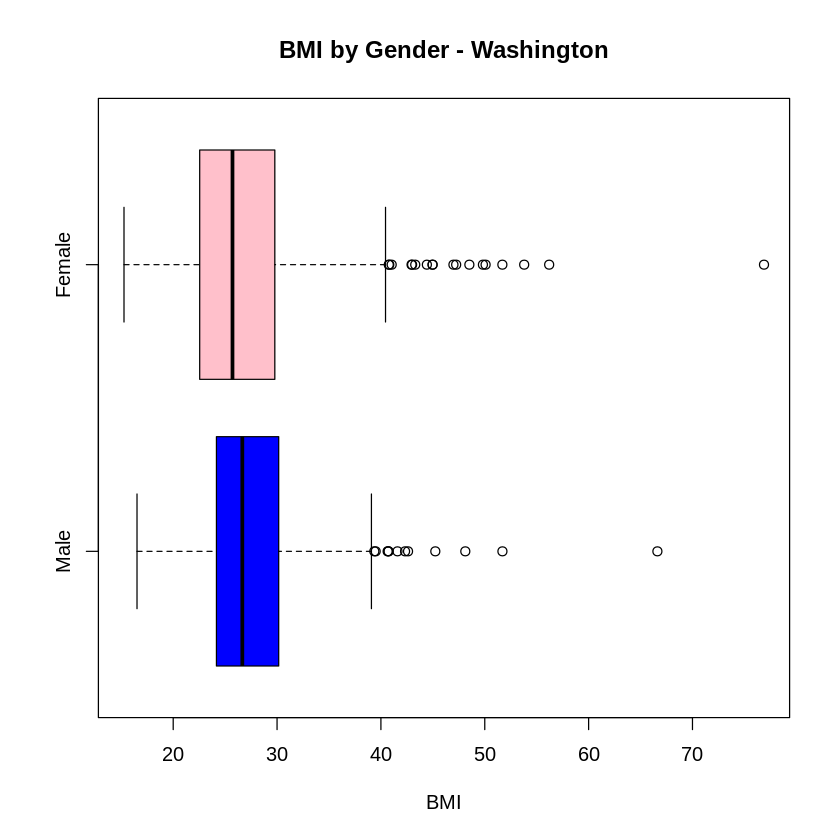

In [ ]:
boxplot(males$bmi, females$bmi, names=c("Male","Female"), col=c("blue","pink"), xlab="BMI", main="BMI by Gender - Washington",horizontal = TRUE)


b) Make a scatterplot of BMI vs age. Use different plotting symbols and colors to identify points for males and females and create a legend for these symbols.

In [ ]:
colors <- c('#FF00FF', # Blue
            '#0000FF') # Pink

In [ ]:
sym <- c(pch =6, #triangle
         pch =8) #star

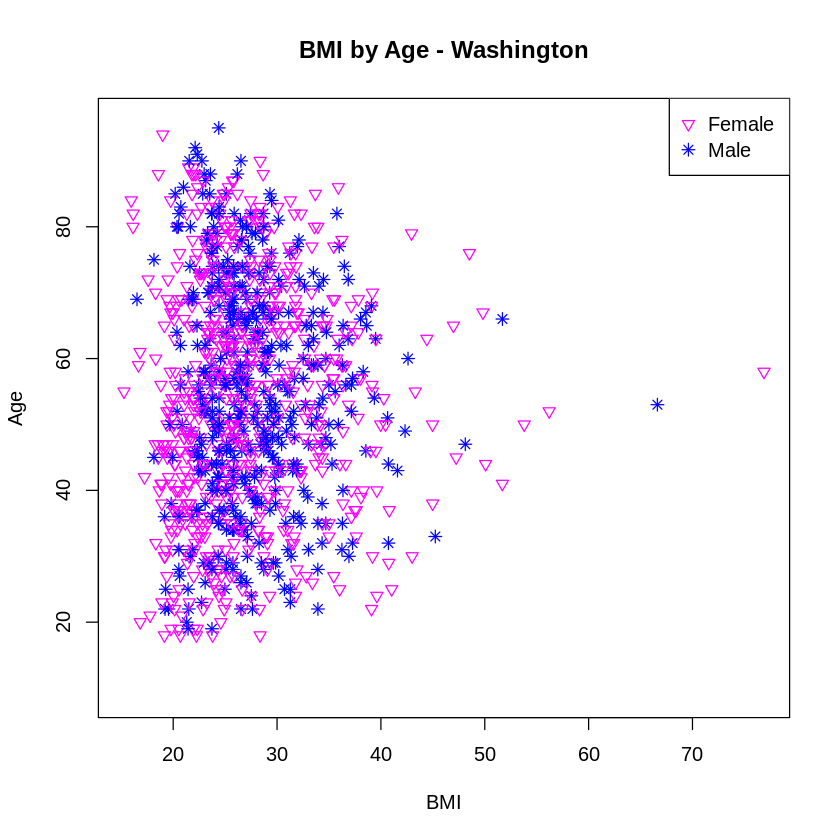

In [ ]:
plot(Washington$bmi, Washington$age, col = colors[factor(Washington$male)], xlab="BMI", ylab="Age", main="BMI by Age - Washington", pch=sym[factor(Washington$male)])
legend("topright", legend = c("Female", "Male"), pch = sym, col = colors)